<a href="https://colab.research.google.com/github/Tea-Yeon-Kim/AI-Class/blob/main/week12/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, LSTMCell, Dense, Input, RNN
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/AAME.csv"
response = requests.get(url)

with open('AAME.csv', 'wb') as file:
    file.write(response.content)

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

df = pd.read_csv(url)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.0,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.0,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.0,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.0,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.0,3.95,3.75,3.75,3.129709,12700


In [3]:
# 컬렴명 확인
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
# 레이블 갯수 확인 (숫자)
df['Close'].value_counts()

,count
Close,
2.00000,292
3.00000,235
2.12500,228
1.87500,208
3.25000,159
...,...
5.09375,1
4.57000,1
4.58000,1


In [5]:
# 결측치 확인
missing_values = df.isnull().sum()

print("\n결측치 개수:")
print(missing_values)


결측치 개수:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [6]:
def split_sequence(data: pd.DataFrame, n_steps: int):
    X, y = [], []
    for i in range(len(data) - n_steps):
        seq_x = data.iloc[i:i + n_steps].values  # ✅ DataFrame 슬라이싱
        seq_y = data.iloc[i + n_steps]['Close']  # ✅ 다음 날 Close만

        X.append(seq_x)
        y.append(seq_y)

    return np.array(X), np.array(y)

In [7]:
df = df.drop(['Date', 'Volume', 'Adj Close'], axis=1)

In [8]:
# 1. X, y 만들기
X, y = split_sequence(df, 10)

In [9]:
# 2. train/test split
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [10]:
# 3. 스케일링 - train으로 fit, test는 transform만. 시계열 데이터는 순서가 정해져 있기 때문에 훈련, 테스트를 나눈 후 정규화
scaler = StandardScaler()
X_train_flat = X_train.reshape(-1, 4)
X_test_flat = X_test.reshape(-1, 4)

X_train_scaled = scaler.fit_transform(X_train_flat).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test_flat).reshape(X_test.shape)


In [11]:
X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape

((8070, 10, 4), (8070,), (2018, 10, 4), (2018,))

In [13]:
# 4. 모델 정의
model = Sequential()
model.add(LSTM(64, activation='tanh', input_shape=(10, 4)))  # 10일, 4개 feature
model.add(Dense(1))  # 다음날 Close 예측
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:

# 5. 학습
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 6.2681
Epoch 2/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0796
Epoch 3/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0411
Epoch 4/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0342
Epoch 5/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0315
Epoch 6/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0268
Epoch 7/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0271
Epoch 8/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0270
Epoch 9/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0254
Epoch 10/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0256
Epoch 11/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0233
Epoch 12/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0233
Epoch 13/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0226
Epoch 14/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0204
Epoch 15/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - lo

In [15]:
# 6. 예측 (test에만)
pred = model.predict(X_test_scaled)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [18]:
# 7. 평가 지표 출력
from sklearn.metrics import mean_squared_error, r2_score

print("Test MSE :", mean_squared_error(y_test, pred))
print("Test R²  :", r2_score(y_test, pred))

Test MSE : 0.009330611032216185
Test R²  : 0.9793814174105845


Test MSE : 0.009330611032216185
Test R²  : 0.9793814174105845


<ipython-input-19-ca4a9af46b43>:13: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-ca4a9af46b43>:13: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-ca4a9af46b43>:13: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-ca4a9af46b43>:13: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-ca4a9af46b43>:13: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarni

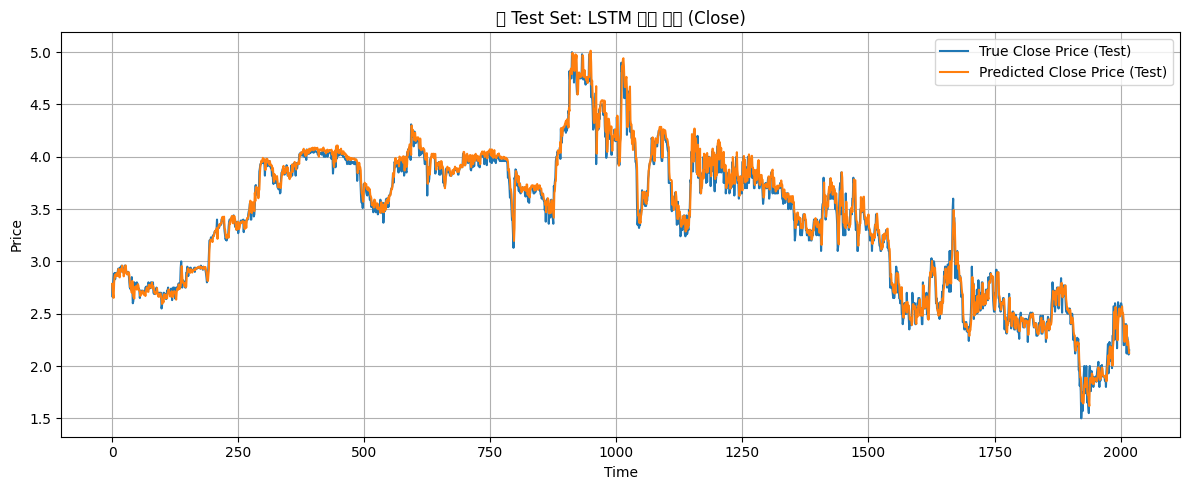

In [19]:
# 8. 시각화
print("Test MSE :", mean_squared_error(y_test, pred))
print("Test R²  :", r2_score(y_test, pred))

plt.figure(figsize=(12, 5))
plt.plot(y_test, label='True Close Price (Test)')
plt.plot(pred, label='Predicted Close Price (Test)')
plt.title("📈 Test Set: LSTM 주가 예측 (Close)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [48]:
# 🧠 은닉 상태/셀 상태 추출용 별도 모델 정의
input_layer = Input(shape=(10, 4))
lstm_out, h_t, c_t = LSTM(8, return_state=True)(input_layer)  # hidden_size=8로 따로 구성
state_model = Model(input_layer, [lstm_out, h_t, c_t])


<ipython-input-49-2a3ccd5c72b5>:16: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-49-2a3ccd5c72b5>:16: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-49-2a3ccd5c72b5>:16: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-49-2a3ccd5c72b5>:16: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-49-2a3ccd5c72b5>:16: UserWarning: Glyph 45769 (\N{HANGUL SYLLABLE NIG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-49-2a3ccd5c72b5>:16: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-49-2a3ccd5c72b5>:16: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipy

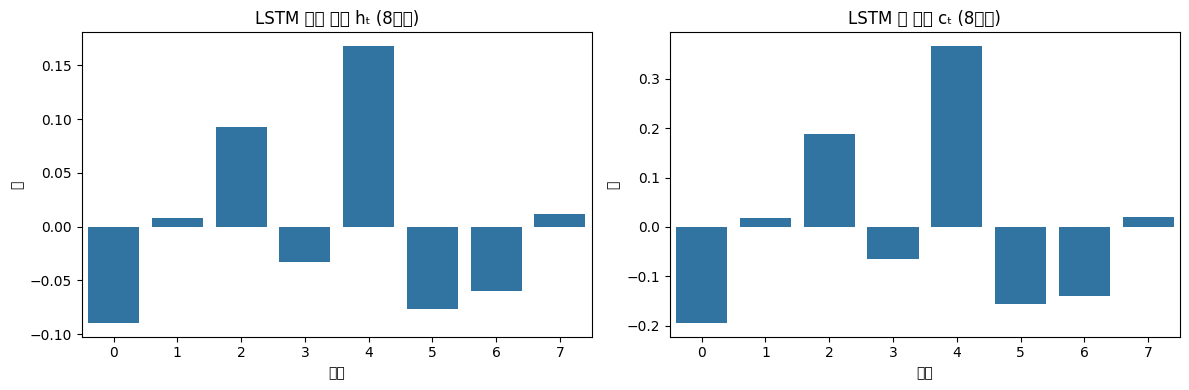

In [49]:
# 은닉 상태 hₜ, 셀 상태 cₜ 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.barplot(x=np.arange(len(h_vec[0])), y=h_vec[0])
plt.title("LSTM 은닉 상태 hₜ (8차원)")
plt.xlabel("차원")
plt.ylabel("값")

plt.subplot(1, 2, 2)
sns.barplot(x=np.arange(len(c_vec[0])), y=c_vec[0])
plt.title("LSTM 셀 상태 cₜ (8차원)")
plt.xlabel("차원")
plt.ylabel("값")

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


<ipython-input-31-3259ede2e4a2>:19: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-31-3259ede2e4a2>:19: UserWarning: Glyph 45769 (\N{HANGUL SYLLABLE NIG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-31-3259ede2e4a2>:19: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-31-3259ede2e4a2>:19: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-31-3259ede2e4a2>:19: UserWarning: Glyph 55120 (\N{HANGUL SYLLABLE HEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-31-3259ede2e4a2>:19: UserWarning: Glyph 47492 (\N{HANGUL SYLLABLE REUM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from font(s) De

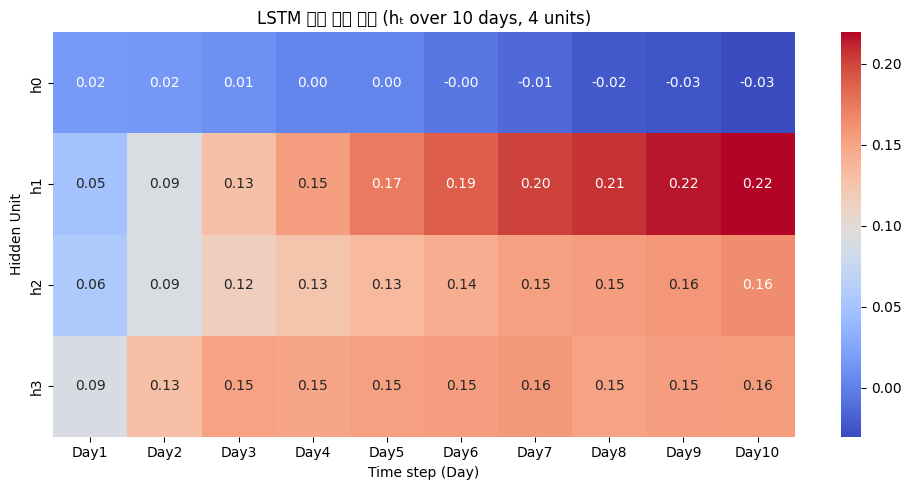

In [31]:
# LSTM 모델 정의 (모든 시점의 hₜ 반환)
inputs = Input(shape=(10, 4))
lstm_out = LSTM(4, return_sequences=True)(inputs)  # 4개 은닉 유닛
state_model = Model(inputs, lstm_out)

# 샘플 하나로 은닉 상태 예측
sample = X_test_scaled[0:1]  # shape: (1, 10, 4)
lstm_outputs = state_model.predict(sample)  # shape: (1, 10, 4)
lstm_outputs = lstm_outputs[0]        # shape: (10, 4)

# 히트맵 시각화 (time x hidden unit)
plt.figure(figsize=(10, 5))
sns.heatmap(lstm_outputs.T, cmap="coolwarm", annot=True, fmt=".2f",
            xticklabels=[f"Day{i+1}" for i in range(10)],
            yticklabels=[f"h{i}" for i in range(4)])
plt.title("LSTM 은닉 상태 흐름 (hₜ over 10 days, 4 units)")
plt.xlabel("Time step (Day)")
plt.ylabel("Hidden Unit")
plt.tight_layout()
plt.show()

✅ 정리: hₜ₋₁ → hₜ에 영향을 주는 구조
📌 그래프에서 본 것처럼:
LSTM은 각 시점마다 h₀, h₁, h₂, h₃를 은닉 벡터로 갖고 있고

이들은 시간 순서대로 업데이트됨

그리고 이전 시점의 hₜ₋₁ (은닉 상태), cₜ₋₁ (셀 상태)가 다음 시점 계산에 직접 영향을 줌

<ipython-input-43-ac8c7c30aa14>:37: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-43-ac8c7c30aa14>:37: UserWarning: Glyph 49472 (\N{HANGUL SYLLABLE SEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-43-ac8c7c30aa14>:37: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-43-ac8c7c30aa14>:37: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-43-ac8c7c30aa14>:37: UserWarning: Glyph 55120 (\N{HANGUL SYLLABLE HEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-43-ac8c7c30aa14>:37: UserWarning: Glyph 47492 (\N{HANGUL SYLLABLE REUM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.pr

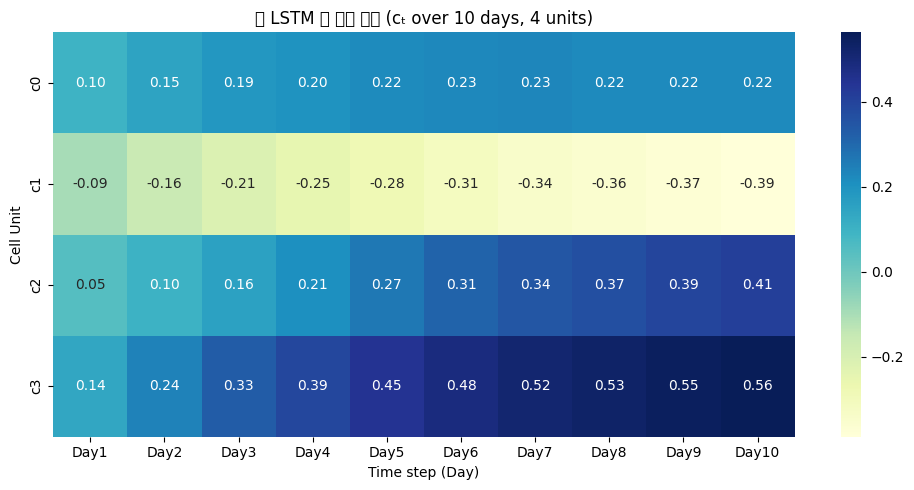

In [43]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import LSTMCell
from sklearn.preprocessing import StandardScaler

# 1. 샘플 선택 (X_scaled는 정규화된 시퀀스 데이터라고 가정)
X_sample = X_test_scaled[0]  # shape: (10, 4)

# 2. LSTMCell 수동 초기화
units = 4
cell = LSTMCell(units)
h0 = tf.zeros((1, units))
c0 = tf.zeros((1, units))
state = [h0, c0]

# 3. 셀 상태 시퀀스 수동 추적
c_list = []

for t in range(10):
    x_t = tf.convert_to_tensor([X_sample[t]])  # shape: (1, 4)
    _, state = cell(x_t, state)
    _, c_t = state
    c_list.append(c_t.numpy().flatten())

# 4. 히트맵 시각화
c_array = np.array(c_list).T  # shape: (units, timesteps)

plt.figure(figsize=(10, 5))
sns.heatmap(c_array, cmap="YlGnBu", annot=True, fmt=".2f",
            xticklabels=[f"Day{i+1}" for i in range(10)],
            yticklabels=[f"c{i}" for i in range(units)])
plt.title("🧠 LSTM 셀 상태 흐름 (cₜ over 10 days, 4 units)")
plt.xlabel("Time step (Day)")
plt.ylabel("Cell Unit")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45769 (\N{HANGUL SYLLABLE NIG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 55120 (\N{HANGUL SYLLABLE HEU}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr

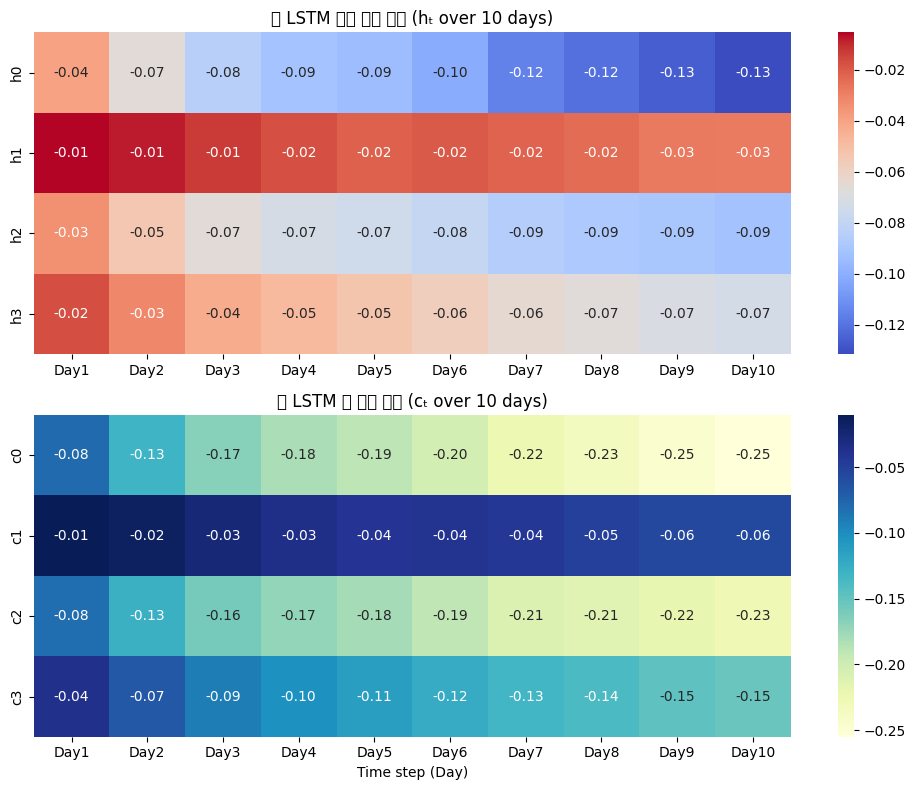

In [45]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import LSTMCell

# 📌 샘플 입력 (X_test_scaled 이미 정규화된 시계열)
X_sample = X_test_scaled[0]  # shape: (10, 4)

# 📌 LSTMCell 정의 및 초기화
units = 4
cell = LSTMCell(units)
h0 = tf.zeros((1, units))
c0 = tf.zeros((1, units))
state = [h0, c0]

# 📌 hₜ, cₜ 시퀀스 수집용 리스트
h_list = []
c_list = []

for t in range(10):
    x_t = tf.convert_to_tensor([X_sample[t]])  # shape: (1, 4)
    _, state = cell(x_t, state)
    h_t, c_t = state
    h_list.append(h_t.numpy().flatten())
    c_list.append(c_t.numpy().flatten())

# 📌 배열 변환: shape = (units, timesteps)
h_array = np.array(h_list).T  # 은닉 상태
c_array = np.array(c_list).T  # 셀 상태

# 📌 히트맵 시각화: 위에는 hₜ, 아래에는 cₜ
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
sns.heatmap(h_array, cmap="coolwarm", annot=True, fmt=".2f",
            xticklabels=[f"Day{i+1}" for i in range(10)],
            yticklabels=[f"h{i}" for i in range(units)])
plt.title("🔵 LSTM 은닉 상태 흐름 (hₜ over 10 days)")

plt.subplot(2, 1, 2)
sns.heatmap(c_array, cmap="YlGnBu", annot=True, fmt=".2f",
            xticklabels=[f"Day{i+1}" for i in range(10)],
            yticklabels=[f"c{i}" for i in range(units)])
plt.title("🟢 LSTM 셀 상태 흐름 (cₜ over 10 days)")

plt.xlabel("Time step (Day)")
plt.tight_layout()
plt.show()


In [68]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import LSTMCell

predicted = model.predict(X_test_scaled[0:1])[0][0]
actual = y_test[0]

# 1. 학습된 모델(model)의 LSTM 가중치 추출
lstm_layer = model.layers[0]  # 첫 번째 LSTM 레이어
weights = lstm_layer.get_weights()  # [kernel, recurrent_kernel, bias]

# 2. 동일한 구조의 LSTMCell 생성 후 가중치 설정
cell = LSTMCell(units=64)  # ← model의 첫 LSTM 레이어와 동일하게 맞추기
cell.build((None, 4))
cell.set_weights(weights)  # 이제 가중치 복사 OK

# 3. 상태 초기화
# 상태를 64차원으로 초기화해야 함!
h0 = tf.zeros((1, 64))
c0 = tf.zeros((1, 64))
state = [h0, c0]

# 4. 시퀀스 선택 (X_scaled에서 1개 샘플)
X_sample = X_test_scaled[0]  # shape: (10, 4)

# 5. 상태 추적
h_list = []
c_list = []

for t in range(10):
    x_t = tf.convert_to_tensor([X_sample[t]])  # (1, 4)
    _, state = cell(x_t, state)
    h_t, c_t = state
    h_list.append(h_t.numpy().flatten())
    c_list.append(c_t.numpy().flatten())
# 📌 배열 변환: shape = (units, timesteps)
h_array = np.array(h_list).T  # 은닉 상태
c_array = np.array(c_list).T  # 셀 상태

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45769 (\N{HANGUL SYLLABLE NIG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/us

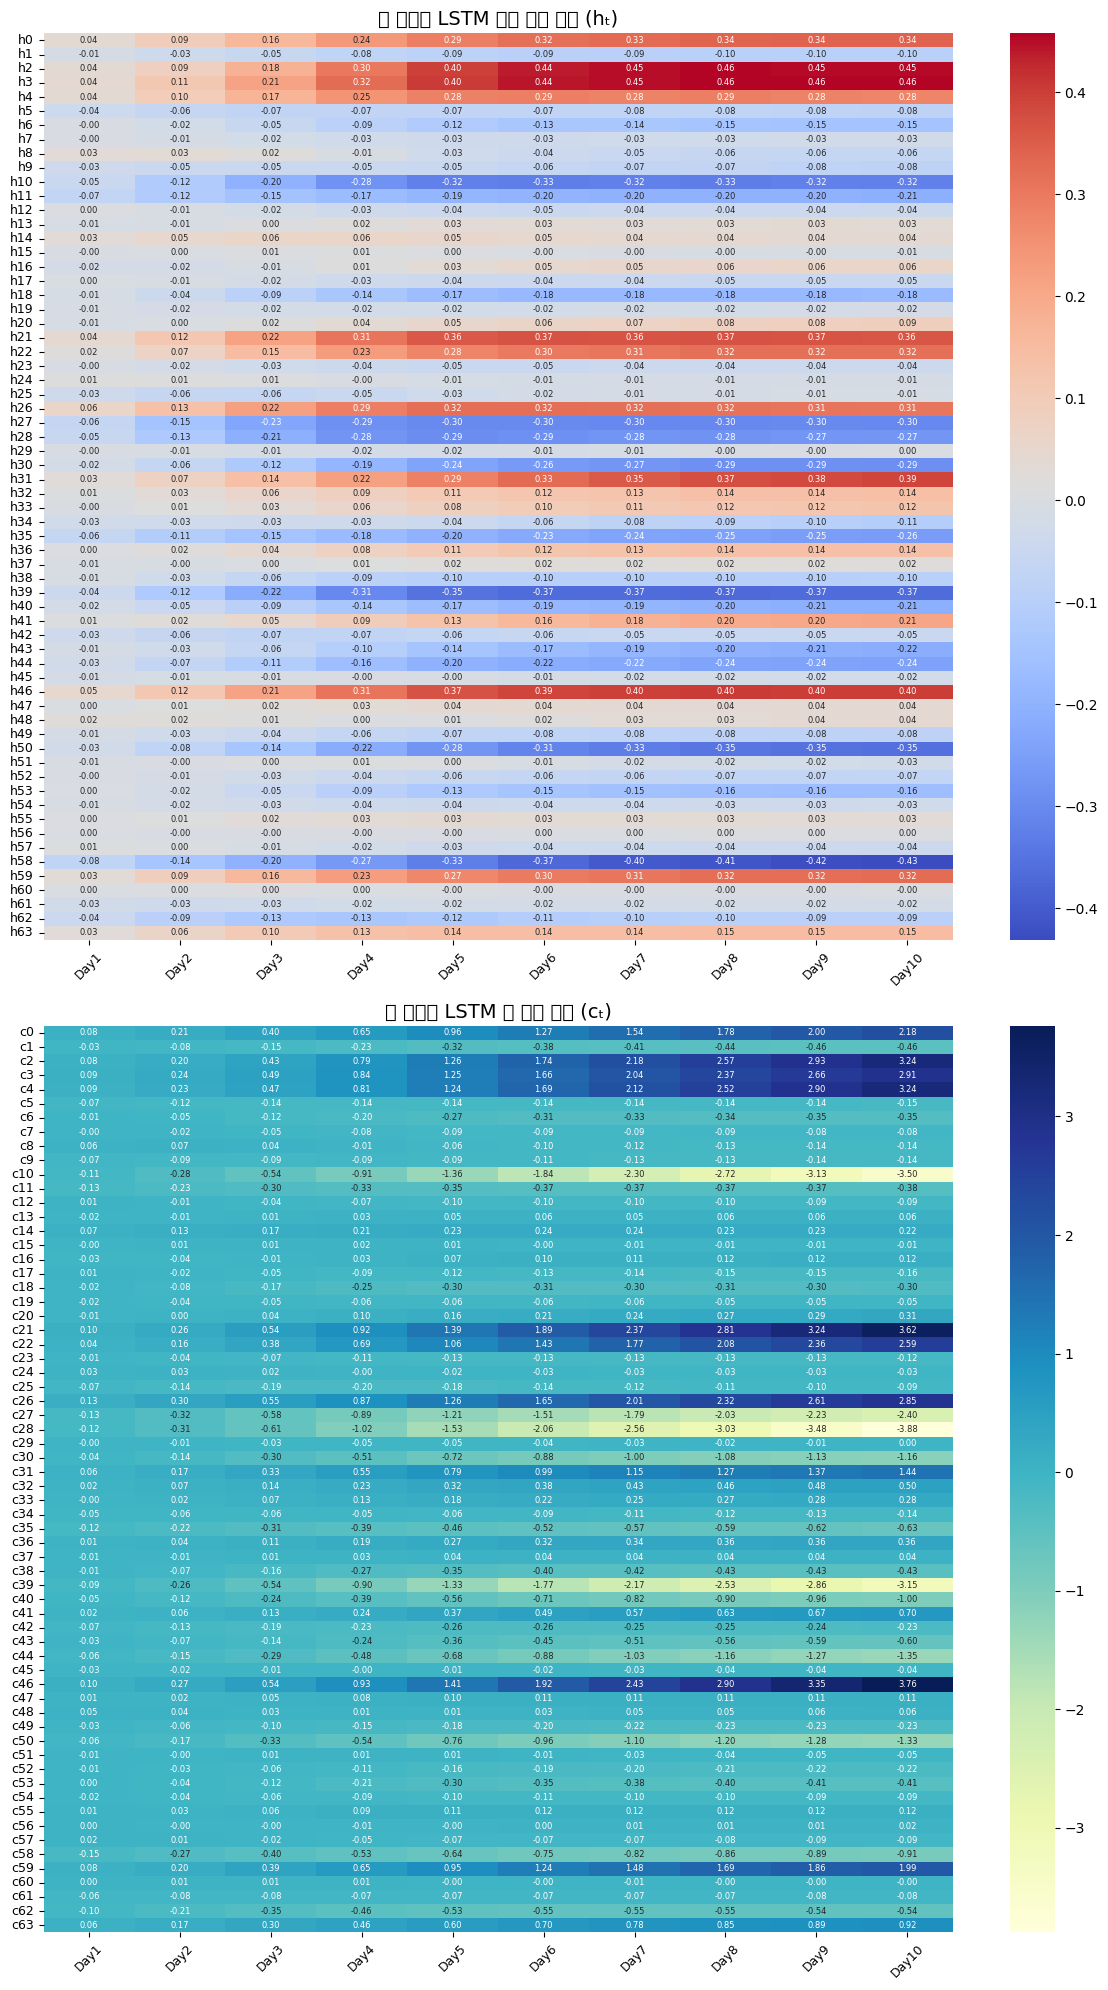

In [69]:

# 6. 시각화
plt.figure(figsize=(12, 20))  # 전체 크기 키우기

# ✅ hₜ heatmap
plt.subplot(2, 1, 1)
sns.heatmap(h_array, cmap="coolwarm", annot=True, fmt=".2f",
            xticklabels=[f"Day{i+1}" for i in range(h_array.shape[1])],
            yticklabels=[f"h{i}" for i in range(h_array.shape[0])],
            annot_kws={"size": 6})  # 글씨 크기 축소
plt.title("🔵 학습된 LSTM 은닉 상태 흐름 (hₜ)", fontsize=14)
plt.xticks(rotation=45, fontsize=9)
plt.yticks(rotation=0, fontsize=9)

# ✅ cₜ heatmap
plt.subplot(2, 1, 2)
sns.heatmap(c_array, cmap="YlGnBu", annot=True, fmt=".2f",
            xticklabels=[f"Day{i+1}" for i in range(c_array.shape[1])],
            yticklabels=[f"c{i}" for i in range(c_array.shape[0])],
            annot_kws={"size": 6})
plt.title("🟢 학습된 LSTM 셀 상태 흐름 (cₜ)", fontsize=14)
plt.xticks(rotation=45, fontsize=9)
plt.yticks(rotation=0, fontsize=9)

plt.tight_layout()
plt.show()

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 중요도 기준 선택 (여기선 cₜ의 절댓값 최대치)
importance = np.max(np.abs(c_array), axis=1)  # shape: (64,)
top_idx = np.argsort(importance)[-10:]  # 상위 10개 인덱스

# 2. 해당 유닛만 추출
top_h = h_array[top_idx, :]  # (10, 10)
top_c = c_array[top_idx, :]

# 3. 유닛 이름 라벨 생성
top_h_labels = [f"h{i}" for i in top_idx]
top_c_labels = [f"c{i}" for i in top_idx]

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51025 (\N{HANGUL SYLLABLE EUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45787 (\N{HANGUL SYLLABLE NIS}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
<ipython-input-74-09d13f45eed8>:20: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-74-09d13f45eed

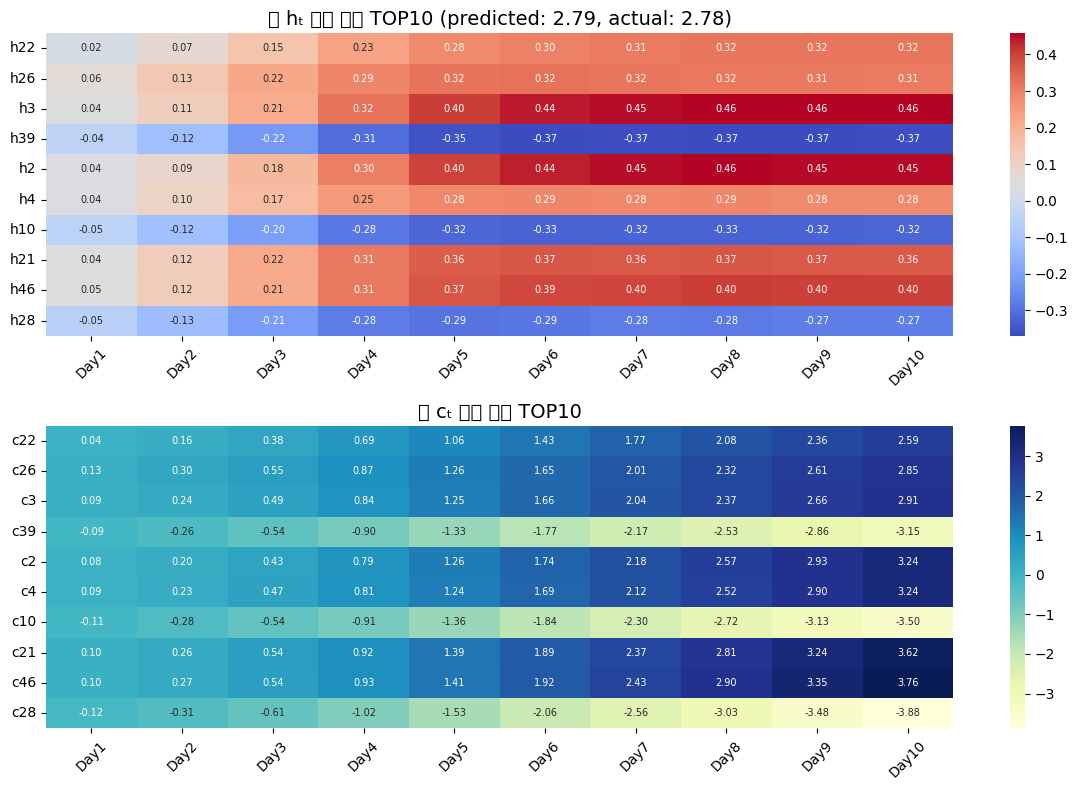

In [74]:
# 4. 시각화
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.heatmap(top_h, cmap="coolwarm", annot=True, fmt=".2f",
            xticklabels=[f"Day{i+1}" for i in range(10)],
            yticklabels=top_h_labels, annot_kws={"size": 7})
plt.title(f"🔵 hₜ 반응 유닛 TOP10 (predicted: {predicted:.2f}, actual: {actual:.2f})", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.subplot(2, 1, 2)
sns.heatmap(top_c, cmap="YlGnBu", annot=True, fmt=".2f",
            xticklabels=[f"Day{i+1}" for i in range(10)],
            yticklabels=top_c_labels, annot_kws={"size": 7})
plt.title("🟢 cₜ 반응 유닛 TOP10", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

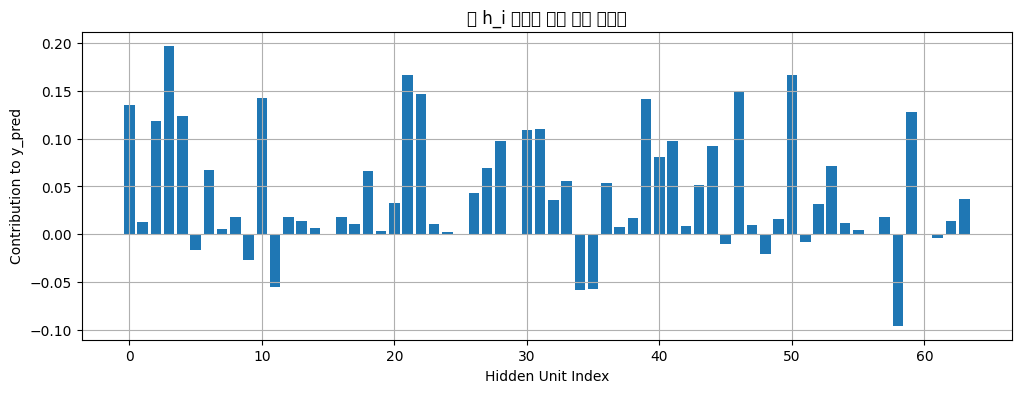

In [76]:
# 1. 마지막 timestep의 h_t 추출
h_final = h_array[:, -1]  # shape: (64,)

# 2. Dense 레이어의 가중치 가져오기
W, b = model.layers[1].get_weights()  # W: (64, 1)

# 3. 기여도 계산
contribution = h_final * W.squeeze()  # shape: (64,)

plt.figure(figsize=(12, 4))
plt.bar(range(64), contribution)
plt.title("각 h_i 유닛의 최종 예측 기여도")
plt.xlabel("Hidden Unit Index")
plt.ylabel("Contribution to y_pred")
plt.grid(True)
plt.show()